# Week 1: Using CNN to classify Kalimat Dataset

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
# Import the zipfile library
import zipfile

# Specify the path to the zip file
zip_path = "Kalimat_processed_1.zip"

# Open the zip file in read mode
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the files in the zip file
    zip_ref.extractall()

Now the images are stored within the `/Kalimat_v1` directory. There is a subdirectory for each class/word.

In [ ]:
source_path = 'Kalimat'

# Make a list of the names of the folders in the source path
folders = os.listdir(source_path)
# ['Alam', 'Asmaa', 'Dar', 'Dars', 'Farawla', 'Helm', 'Hyah', 'Kitab', 'Nagma', 'Nar', 'Qamar', 'Qita', 'Rasm', 'Roman', 'Sa3a', 'Sahara', 'Samaka', 'Shams', 'Shanta', 'Share3', 'So3ban', 'Thalg', 'Zahb', 'Zaky']
source_paths = [os.path.join(source_path, folder) for folder in folders]

print(f"\nThere are {sum([len(files) for r, d, files in os.walk(source_path)])} images in total")


There are 1514 images in total


A Directory for kalimat_dataset, and subdirectories for training
and validation. These in turn will need subdirectories for each word.

In [ ]:
# Define root directory
root_dir = 'kalimat_dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  sub_dirs = ["training", "validation"]
  sub_subdirs = os.listdir(source_path)

  for sub_dir in sub_dirs:
    sub_path = os.path.join(root_path, sub_dir)
    os.makedirs(sub_path)
    for subsub_dir in sub_subdirs:
      subsub_path = os.path.join(sub_path, subsub_dir)
      os.makedirs(subsub_path)
  pass


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
import os
from PIL import Image, ImageOps
import numpy as np
import datetime
from tqdm import tqdm

progress_bar = tqdm(total=sum([len(files) for r, d, files in os.walk(source_path)]), desc="Cropping images", unit="file")
for source_path in source_paths:
    if os.path.isdir(source_path):
        files = os.listdir(source_path)
        for file in files:
            img = Image.open(os.path.join(source_path, file))
            img = ImageOps.exif_transpose(img)
            img_array = np.array(img)
            width, height = img.size
            x1 = width - 1
            x2 = 0
            y1 = height - 1
            y2 = 0
            for y in range(height):
                for x in range(width):
                    pixel_value = img_array[y, x]
                    for i in range(4):
                        if(pixel_value[i] != 255):
                            x1 = min(x1, x)
                            x2 = max(x2, x)
                            y1 = min(y1, y)
                            y2 = max(y2, y)
                        break

            cropped_img = img.crop((x1, y1, x2, y2))
            cropped_img = cropped_img.resize((64, 32))
            cropped_img.save(os.path.join(source_path, file),format="PNG")
            progress_bar.update(1)
    else:
        print("Invalid directory path. Please enter a valid directory.")

Cropping images:   0%|          | 0/46 [00:40<?, ?file/s]
Cropping images: 1514file [1:18:23,  5.75s/file]

In [ ]:
# prompt: zip Kalimat_v1

!zip -r Kalimat_v11.zip /content/Kalimat_v1


In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

kalimat_dataset/training
kalimat_dataset/validation
kalimat_dataset/training/Nar
kalimat_dataset/training/Helm
kalimat_dataset/training/Rasm
kalimat_dataset/training/Kitab
kalimat_dataset/training/Dar
kalimat_dataset/training/Thalg
kalimat_dataset/training/Shanta
kalimat_dataset/training/Shams
kalimat_dataset/training/Sa3a
kalimat_dataset/training/Zahb
kalimat_dataset/training/Alam
kalimat_dataset/training/Asmaa
kalimat_dataset/training/Share3
kalimat_dataset/training/Farawla
kalimat_dataset/training/Sahara
kalimat_dataset/training/Qamar
kalimat_dataset/training/Qita
kalimat_dataset/training/Dars
kalimat_dataset/training/Nagma
kalimat_dataset/training/So3ban
kalimat_dataset/training/Roman
kalimat_dataset/training/Samaka
kalimat_dataset/training/Zaky
kalimat_dataset/training/Hyah
kalimat_dataset/validation/Nar
kalimat_dataset/validation/Helm
kalimat_dataset/validation/Rasm
kalimat_dataset/validation/Kitab
kalimat_dataset/validation/Dar
kalimat_dataset/validation/Thalg
kalimat_dataset/va

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  """
  split_point = int(len(os.listdir(SOURCE_DIR))*SPLIT_SIZE)
  source_images = os.listdir(SOURCE_DIR)

  random.sample(source_images, len(source_images))

  training_images = source_images[:split_point]
  validation_images = source_images[split_point:]

  for img in training_images:
    # Get the img path
    source_path = os.path.join(SOURCE_DIR, img)
    training_path = os.path.join(TRAINING_DIR, img)
    if os.path.getsize(source_path) > 0:
      copyfile(source_path, training_path)
    else:
      print(f"{img} is zero length, so ignoring.")

  for img in validation_images:
    # Get the img path
    source_path = os.path.join(SOURCE_DIR, img)
    training_path = os.path.join(VALIDATION_DIR, img)
    if os.path.getsize(source_path) > 0:
      copyfile(source_path, training_path)
    else:
      print(f"{img} is zero length, so ignoring.")


In [ ]:
source_dirs = [os.path.join(source_path, folder) for folder in folders]

TRAINING_DIR = "kalimat_dataset/training/"
VALIDATION_DIR = "kalimat_dataset/validation/"

training_dirs = [os.path.join(TRAINING_DIR, folder) for folder in folders]
validation_dirs = [os.path.join(VALIDATION_DIR, folder) for folder in folders]


# Empty directories in case you run this cell multiple times
for directory in training_dirs:
  if os.path.exists(directory):
    shutil.rmtree(directory)
    os.makedirs(directory)

for directory in validation_dirs:
  if os.path.exists(directory):
    shutil.rmtree(directory)
    os.makedirs(directory)

split_size = .7

for source, train, val in zip(source_dirs, training_dirs, validation_dirs):
    split_data(source, train, val, split_size)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=5,
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     shear_range=0.02,
                                     zoom_range=0,
                                     horizontal_flip=False,
                                     vertical_flip=False,
                                     fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(56, 28))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(56, 28))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1049 images belonging to 24 classes.
Found 465 images belonging to 24 classes.


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(56, 28, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(len(source_dirs), activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

## Checkpoint

In [ ]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
n_batches = 20
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  verbose=1,
                                                  save_weights_only=True,
                                                  save_freq=30*n_batches)


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
# prompt: Tensorflow Callback function to stop at 99 accuracy or 98 val accuracy

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
    elif(logs.get('val_accuracy') >= 0.98):
      print("\nReached 98% validation accuracy so cancelling training!")
      self.model.stop_training = True

acc_callback = myCallback()


In [ ]:
# Get the untrained model
model = create_model()

# Load latest weights
model.load_weights(latest)
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[cp_callback,acc_callback])

Epoch 1/100
53/53 [==============================] - 11s 186ms/step - loss: 0.8915 - accuracy: 0.7112 - val_loss: 0.2348 - val_accuracy: 0.9419
Epoch 2/100
46/53 [=========================>....] - ETA: 1s - loss: 0.8826 - accuracy: 0.7239
Epoch 2: saving model to training/cp.ckpt
53/53 [==============================] - 10s 183ms/step - loss: 0.8857 - accuracy: 0.7216 - val_loss: 0.2222 - val_accuracy: 0.9376
Epoch 3/100
53/53 [==============================] - 13s 246ms/step - loss: 0.8738 - accuracy: 0.7293 - val_loss: 0.1693 - val_accuracy: 0.9527
Epoch 4/100
53/53 [==============================] - 9s 166ms/step - loss: 0.9091 - accuracy: 0.7054 - val_loss: 0.1776 - val_accuracy: 0.9591
Epoch 5/100
53/53 [==============================] - 14s 259ms/step - loss: 0.8435 - accuracy: 0.7331 - val_loss: 0.2378 - val_accuracy: 0.9398
Epoch 6/100
53/53 [==============================] - 10s 182ms/step - loss: 0.8918 - accuracy: 0.7140 - val_loss: 0.2835 - val_accuracy: 0.9204
Epoch 7/100


In [ ]:
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=19))

In [ ]:
# prompt: zip

!zip -r weights_M1_v1.zip /content/training


updating: content/training/ (stored 0%)
updating: content/training/cp.ckpt.index (deflated 62%)
updating: content/training/checkpoint (deflated 38%)
updating: content/training/cp.ckpt.data-00000-of-00001 (deflated 15%)


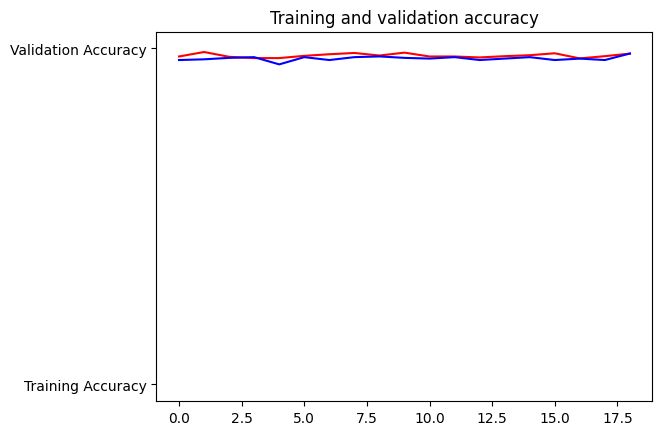

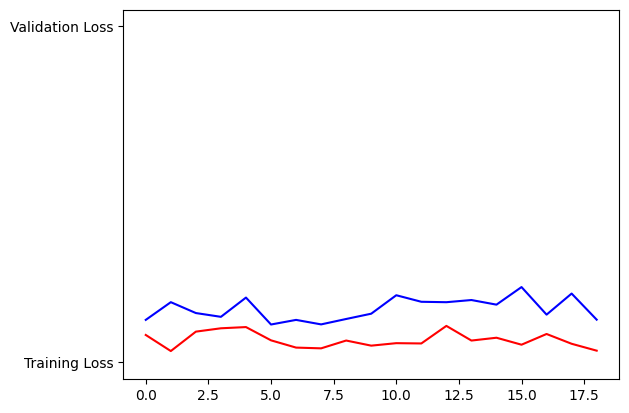

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# Save the entire model

In [ ]:
model.save('Kalimat_M1_v2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing the Model

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
al_kalimat = {i : folder for i, folder in enumerate(folders)}
loaded_model = tf.keras.models.load_model('Kalimat_M1_v2.h5')

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(56, 28))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = loaded_model.predict(images, batch_size=10)
  print(fn)
  print(f"Predication: {al_kalimat[np.argmax(classes)]}")
  print(f"Confidence: {np.max(classes)*100}%")

Saving frame_00023.png to frame_00023.png
1/1 [==============================] - 0s 93ms/step
frame_00023.png
Predication: Nar
Confidence: 100.0%


In [ ]:
# prompt: Load the model and run it

loaded_model = tf.keras.models.load_model('Model_1_v1.h5')
uploaded = files.upload()
al_kalimat = {
     0: 'علم',
     1: 'كتاب',
     2: 'نجمة',
     3: 'نار',
     4: 'قمر',
     5: 'قطة',
     6: 'رسم',
     7: 'شمس',
     8: 'ذهب',
     9: 'ذكي'
}
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(56, 28))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = loaded_model.predict(images, batch_size=10)
  print(fn)
  print(f"Predication: {al_kalimat[np.argmax(classes)]}")
  print(f"Confidence: {np.max(classes)*100}%")
